In [1]:
from mobile.config import LOCATIONS, CLIENT_LOCATIONS, HOME_SHIFT
from mobile.utils import *
import time
import geopy

## TODO
* Write up the "kernel" property and have better visualizations
* Fix Set Cover IP
* Experiment tradeoff between radius and number of facilities placed
* Qualitatively compare the facilities which are placed by the different algorithms: center of homes, fpt, set cover

In [2]:
from mobile.heuristics import *

data = {}
data1 = {}

for alg in [center_of_homes, most_coverage, most_populous]:
    print(alg.__name__)
    data[alg.__name__] = []
    data1[alg.__name__] = []
    
    for num_facility in range(3,11,1):
        (fac, asgn) = alg(num_facility)
        print(asgn)
        obj = calculate_objective(asgn, 95)
        obj1 = calculate_objective(asgn, 100)
        
        data[alg.__name__].append(obj)
        data1[alg.__name__].append(obj1)
        #print(num_facility, obj)

center_of_homes
[(30, 3), (51, 51), (0, 0), (4, 0), (51, 51), (2, 0), (2, 0), (3, 3), (15, 0), (0, 0), (15, 0), (42, 0), (2, 0), (6, 0), (15, 0), (405, 51), (51, 51), (3, 3), (0, 0), (0, 0), (24, 0), (8441, 0), (0, 0), (0, 0), (0, 0), (10, 3), (0, 0), (23, 0), (0, 0), (3, 3), (0, 0), (15, 0), (0, 0), (6, 0), (0, 0), (3, 3), (0, 0), (0, 0), (23, 0), (2, 0), (225, 0), (25, 0), (0, 0), (10, 3), (0, 0), (0, 0), (6, 0), (3, 3), (0, 0), (0, 0), (51, 51), (0, 0), (3, 3), (4, 0), (3, 3), (42, 0), (4522, 0), (47, 0), (9, 3), (624, 0), (6, 0), (15, 0), (50, 3), (15, 0), (2, 0), (0, 0), (0, 0), (15, 0), (436, 51), (15, 0), (2, 0), (48, 0), (0, 0), (0, 0), (0, 0), (23, 0), (257, 0), (0, 0), (0, 0), (3, 3), (0, 0), (20, 0), (0, 0), (3, 3), (121, 0), (11, 3), (24, 0), (2, 0), (0, 0), (25, 0), (15, 0), (201, 0), (501, 0), (23, 0), (225, 0), (0, 0), (0, 0), (7411, 0), (0, 0), (23, 0), (371, 0), (0, 0), (3, 3), (0, 0), (8990, 0), (0, 0), (11, 3), (51, 51), (10, 3), (25, 0), (24, 0), (0, 0), (6, 0), (51

In [11]:
fpt_data = []

for k in range(3,11):
    fpt_data.append(fpt(k, 15))

COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:02:37,852	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:04:16,232	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:06:08,336	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:08:18,493	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:10:49,757	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:13:43,704	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:16:58,838	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8888285679816624


2021-09-25 13:20:32,389	INFO worker.py:835 -- Calling ray.init() again after it has already been called.


In [17]:
for d in fpt_data:
    print(d[0])

(3.678417844684001, [16, 1, 41])
(2.860468012062293, [16, 1, 3, 41])
(1.3471783791678482, [0, 8, 41, 10, 16])
(1.081129402891175, [0, 1, 8, 41, 10, 16])
(0.7315324735425953, [1, 5, 8, 41, 10, 15, 16])
(0.6281145051891007, [1, 3, 5, 8, 41, 10, 15, 16])
(0.4532343238485892, [1, 3, 5, 7, 8, 41, 10, 15, 16])
(0.3817617200440133, [0, 1, 3, 7, 8, 9, 10, 41, 15, 16])


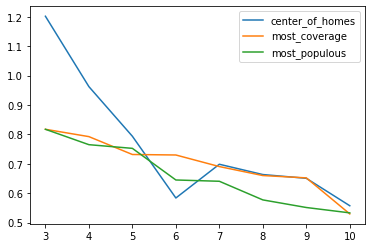

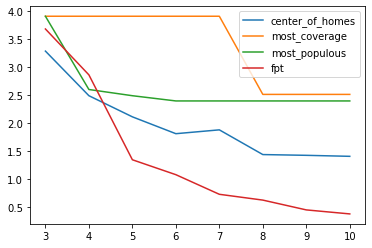

In [24]:
import matplotlib.pyplot as plt

for alg in [center_of_homes, most_coverage, most_populous]:
    plt.plot([i for i in range(3,11,1)], data[alg.__name__])

    
plt.legend([center_of_homes.__name__, most_coverage.__name__, most_populous.__name__, fpt.__name__])
plt.show()

for alg in [center_of_homes, most_coverage, most_populous]:
    plt.plot([i for i in range(3,11,1)], data1[alg.__name__])
    
plt.plot([i for i in range(3,11,1)], [d[0][0] for d in fpt_data])
plt.legend([center_of_homes.__name__, most_coverage.__name__, most_populous.__name__, fpt.__name__])
plt.show()


In [44]:
set_cover_lp(set([1,2,3]), [set([1,2]), set([1]), set([2,3])])
set_cover_ip(set([1,2,3]), [set([1,2]), set([1]), set([2,3])])

Solution:
Objective value = 2.0
x1 = 0.0
x2 = 1.0
x3 = 1.0
Solution:
Objective value = 2.0
x1 = 0.0
x2 = 1.0
x3 = 1.0


In [97]:
from ortools.linear_solver import pywraplp
from ortools.linear_solver.pywraplp import Variable, Constraint, Objective
from typing import List, Set

def set_cover_lp(uni: Set[int], R: List[Set[int]]):
    solver = pywraplp.Solver.CreateSolver('GLOP')
    
    #defining variables
    X = []
    for i, S_i in enumerate(R):
        X.append(solver.NumVar(0, 1, 'x' + str(i)))
        
    #setting constraints
    for j in uni:
        cover: Constraint = solver.Constraint(1, solver.infinity())
        
        for i, S_i in enumerate(R):    
            if j in S_i:
                cover.SetCoefficient(X[i], 1)
            else:
                cover.SetCoefficient(X[i], 0)

    #setting objective
    num_sets: Objective = solver.Objective()
        
    for i, S_i in enumerate(R):
        num_sets.SetCoefficient(X[i], 1)
        
    num_sets.SetMinimization()
    
    #solving LP
    print('Solving LP')
    status = solver.Solve()
    
    #printing output
    if status == pywraplp.Solver.OPTIMAL:        
        print('Objective value =', solver.Objective().Value())
    else:
        print('The problem does not have an optimal solution.')
    
    return [X[i].solution_value() for i in range(len(R))]
        
        
def set_cover_ip(uni: Set[int], R: List[Set[int]]):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    #solver.time_limit.seconds = 30
    
    #defining variables
    X = []
    for i, S_i in enumerate(R):
        X.append(solver.IntVar(0, 1, 'x' + str(i)))
        
    #setting constraints
    for j in tqdm.tqdm_notebook(uni):
        cover: Constraint = solver.Constraint(1, solver.infinity())
        
        for i, S_i in enumerate(R):    
            if j in S_i:
                cover.SetCoefficient(X[i], 1)

    #setting objective
    num_sets: Objective = solver.Objective()
        
    for i, S_i in enumerate(R):
        num_sets.SetCoefficient(X[i], 1)
        
    num_sets.SetMinimization()
    
    #solving IP
    print("Solving IP")
    status = solver.Solve()
    
    #printing output
    if status == pywraplp.Solver.OPTIMAL:
        print('Objective value =', solver.Objective().Value())
    else:
        print('The problem does not have an optimal solution.')
        
    return [X[i].solution_value() for i in range(len(R))]

In [99]:
pywraplp.Solver.FEASIBLE

1

In [ ]:
sol = set_cover_ip(ans[2], radius_list)
print(sum(sol))

<ipython-input-97-906fce1b60da>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm.tqdm_notebook(uni):


In [83]:
from ortools.sat.python import cp_model
model = cp_model.CpModel()
#solver = pywraplp.Solver.CreateSolver('GUROBI_IP')
print(model)

In [ ]:
cover_data = []
print("hi")
for k in range(5,11,1):
    cover_data.append(cover_approx(neighbors, k))

hi
1.05


<ipython-input-43-ec5edae910b1>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l, neighbor in tqdm.tqdm_notebook(neighbors.items()):



1.05 11
1.525



1.525 7
1.7625


In [45]:
def cover_approx(neighbors, k: int):
    
    l = 0.1
    h = 4
    
    facilities = []
    objective = 10005
    
    #alpha = 0
    
    #for i in range(1, len(CLIENT_LOCATIONS)+1):
    #    alpha += 1/i
    
    #print(alpha)
    
    alpha = 1
    
    while h-l > 1e-3:
        r = (l+h)/2
        
        print(r)
        
        sol = set_cover_softmax(neighbors, radius = r, top=10, times = 40)
        
        if len(sol) <= alpha * k:
            h = (l+h)/2
            facilities = sol
            objective = r
        else:
            l = (l+h)/2
            
        print(r, len(sol))
        
    return facilities, objective

In [43]:
def set_cover_softmax(neighbors, radius: float, top: int = 1, times: int = 1):

    radius_dict = {}

    for l, neighbor in tqdm.tqdm_notebook(neighbors.items()):

        radius_dict[l] = set()

        for n in neighbor:

            if n[0] <= radius:                
                ngbr = n[1]
                radius_dict[l] = radius_dict[l].union(LOCATIONS[ngbr]['pid'])
            else:
                break
    
    total_length = len(CLIENT_LOCATIONS)
    radius_dict_id = ray.put(radius_dict)
    
    
    @ray.remote
    def process(radius_dict):
        #print('starting process')
        covered = set()
        chosen = set()

        while len(covered) != total_length:

            max_coverage = []

            for loc in radius_dict.keys():

                if loc not in chosen:

                    individuals_covered = radius_dict[loc] - covered
                    max_coverage.append((len(individuals_covered), loc, individuals_covered))

            max_coverage = sorted(max_coverage, reverse = True)

            if max_coverage[0][0] == 0:
                break

            choice = max_coverage[scipy.stats.boltzmann.rvs(lambda_=0.8, N=top)]

            covered = covered.union(choice[2])
            chosen.add(choice[1])
            #print(len(covered))

        return (len(chosen), chosen, covered)

    #print("here")
    results = [ray.get(process.remote(radius_dict_id)) for _ in range(times)]
    results = sorted(results)
       
    
    return results[0][1]

In [22]:
#CLIENT_LOCATIONS.keys()

In [29]:
import tqdm

def generate_sorted_list():
    
    neighbors = {}
    
    LOCATIONS_act = [l for l in range(len(LOCATIONS)) if not LOCATIONS[l]['home']]
    
    for l in tqdm.tqdm(LOCATIONS_act):
        sorted_distance_neighbors = []
        
        for j in range(len(LOCATIONS)):
            dist = calculate_distance(l, j)
            sorted_distance_neighbors.append((dist, j))
            
        sorted_distance_neighbors = sorted(sorted_distance_neighbors, reverse = False)
        neighbors[l] = sorted_distance_neighbors
    
    return neighbors

In [30]:
neighbors = generate_sorted_list()

<ipython-input-29-b3e81b72891a>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l in tqdm.tqdm_notebook(LOCATIONS_act):



915.8863143920898


In [64]:
radius = 0.5
correspondence = []
radius_list = []

for l, neighbor in tqdm.tqdm_notebook(neighbors.items()):

    correspondence.append(l)
    covered_ell = set()

    for n in neighbor:

        if n[0] <= radius:                
            ngbr = n[1]
            covered_ell = covered_ell.union(LOCATIONS[ngbr]['pid'])
        else:
            radius_list.append(covered_ell)
            break

<ipython-input-64-49b0529dda6f>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l, neighbor in tqdm.tqdm_notebook(neighbors.items()):


In [78]:
sol = set_cover_ip(ans[2], radius_list)

AttributeError: 'Solver' object has no attribute 'parameters'

In [68]:
sol2 = set_cover_lp(ans[2], radius_list)

Solving LP
Objective value = 26.329291575907977


In [58]:
set(CLIENT_LOCATIONS.keys())-set(ans[2])
print(len(CLIENT_LOCATIONS))

{5617257, 5603252}
33156


In [39]:
import numpy as np
import scipy
import scipy.stats
import scipy.special
import ray

ans = set_cover_softmax(neighbors, 0.5, 10, 40)

<ipython-input-31-f3d030fe5db0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l, neighbor in tqdm.tqdm_notebook(neighbors.items()):


KeyboardInterrupt: 

In [13]:
sum(sol)

0.0

In [ ]:
import numpy as np
import scipy
import scipy.stats
import scipy.special
import ray

ans = set_cover_softmax(neighbors, 1.5, 10, 40, True)
print(len(ans))
ans = set_cover_softmax(neighbors, 1.5, 10, 40, False)
print(len(ans))

/home/dpm7pb/.local/lib/python3.8/site-packages/ray/_private/services.py:238: UserWarning: Not all Ray Dashboard dependencies were found. To use the dashboard please install Ray using `pip install ray[default]`. To disable this message, set RAY_DISABLE_IMPORT_WARNING env var to '1'.
  warnings.warn(warning_message)


In [ ]:
if parallel:
        a = time.time()
        ray.init(ignore_reinit_error=True)
        LOCATIONS_id = ray.put(LOCATIONS)

        @ray.remote
        def process1(neighbor, LOCATIONS):
            arr = set()

            for n in neighbor:

                if n[0] <= radius:                
                    ngbr = n[1]
                    arr = arr.union(LOCATIONS[ngbr]['pid'])
                else:
                    break

            return arr

        radius_dict = {l:ray.get(process1.remote(neighbor, LOCATIONS_id)) for (l, neighbor) in neighbors.items()}
        print(time.time()-a)


In [ ]:
from mobile.config import PROJECT_ROOT
with open(PROJECT_ROOT/ 'output'/ 'runs'/ 'charlottesville_city' / f'neighbors.json', 'r') as f:
    data = json.load(f)
    neighbors = data['neighbors']

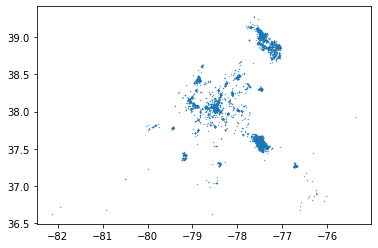

In [37]:
plt.scatter(x=locations['longitude'],y=locations['latitude'], s=0.1)

In [30]:
residents.head()

rlid  longitude   latitude  altitude  admin1  admin2  admin3  admin4  \
0  17044 -78.475050  38.066151        -1      51     540     800       1   
1  17046 -78.473818  38.069160        -1      51     540     800       1   
2  17061 -78.497536  38.059734        -1      51     540     800       4   
3  17063 -78.498064  38.060366        -1      51     540     800       4   
4  17064 -78.486814  38.060308        -1      51     540     800       4   

   area_sqm  associate_link_func_class  ...  pub_03  pub_04  pub_05  pub_06  \
0       169                          5  ...   77881   77881   77883   77883   
1       171                          5  ...   77881   77881   77883   77883   
2       263                          5  ...   77885   77885   77883   77883   
3       156                          5  ...   77881   77881   77883   77883   
4       248                          5  ...   77881   77881   77883   77883   

   pub_07  pub_08  pub_09  pub_10  pub_11  pub_12  
0   77688   77688   77880   77880   77880   77880  
1   77688   77688   77880   77880   77880   77880  
2   77672   77672   77880   77880   77880   77880  
3   77672   77672   77880   77880   77880   77880  
4   77688   77688   77880   77880   77880   77880  

[5 rows x 24 columns]

In [77]:
residents.columns

Index(['rlid', 'longitude', 'latitude', 'altitude', 'admin1', 'admin2',
       'admin3', 'admin4', 'area_sqm', 'associate_link_func_class', 'pub_pk',
       'pub_kg', 'pub_01', 'pub_02', 'pub_03', 'pub_04', 'pub_05', 'pub_06',
       'pub_07', 'pub_08', 'pub_09', 'pub_10', 'pub_11', 'pub_12'],
      dtype='object')

In [31]:
residents.shape

(10038, 24)

In [28]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%load_ext autoreload
%autoreload 2

from utils import *
from heuristics import _k_supplier
import geopy
import math
import time
from joblib import Parallel, delayed


def fpt2_parallel(k: int, s: int):
    """
    Assumes the number of locations visited by clients is bounded by a constant
    Run k-supplier on all combination sets of locations that will be covered by facilities. Select the guess and its open facilities with the smallest objective value.
    
    PARAMETERS
    ----------
    k : int
        number of facilities to be opened
    
    RETURNS
    ----------
    facilities : List[int]
        contains facility indices that are open
    assignments : List[Tuple[int, int]]
        visited location and facility assignment indexed by each client
    """
    potential_facility_locations = list(range(s))
    
    #Remove homes from the client_location lists
    #TODO: Perhaps create mapping for the indices of people before exclusion and after?
    client_locations_excluded = []
    for person in CLIENT_LOCATIONS.values():
        new_list = [p for p in person['lid'][1:] if p in potential_facility_locations]
        if len(new_list)>0:
            client_locations_excluded.append(new_list)
    
    locations = [i for i in range(len(LOCATIONS)) if LOCATIONS[i]['lid'] < HOME_SHIFT]
    
    G, loc_map, c_loc_map = precompute_distances(client_locations_excluded, locations)
    
    def process(guess):
        facilities = _k_supplier(list(guess), locations, k)
        obj_value = assign_client_facilities2(G, loc_map, c_loc_map, client_locations_excluded, facilities)
        
        return obj_value, facilities

    results = Parallel(n_jobs=16)(delayed(process)(guess) for guess in powerset(list(potential_facility_locations)))
    
    min_obj_guess: Tuple[int, List[int]] = min(results)
    return min_obj_guess, assign_facilities(min_obj_guess[1])

In [19]:
from heuristics import *

In [5]:
(val, asgn) = fpt3_parallel2(5, 15, 0)

COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8028109542767523


2021-08-17 19:20:15,752	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8265


KeyboardInterrupt: 

In [6]:
calculate_objective(asgn)

2.3956977875908194

In [20]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range((len(s)+1)//2,-1,-1))

In [29]:
print([i for i in range(1,5)])

[1, 2, 3, 4]


In [7]:
from heuristics import *

fac1, asgn1 = center_of_homes(5)
print(calculate_objective(asgn1))


1.993687977423548


In [9]:
home_obj = [calculate_percentile_objective(asgn1, i/100) for i in range(50,101,1)]

In [8]:
fac2, asgn2 = center_of_centers(5)
print(calculate_objective(asgn2))

6.395545048189607


In [10]:
center_obj = [calculate_percentile_objective(asgn2, i/100) for i in range(50,101,1)]

In [12]:
import matplotlib.pyplot as plt
x = [i for i in range(50,101,1)]

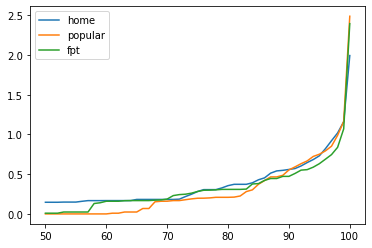

In [46]:
plt.plot(x, home_obj, label='home')
#plt.plot(x, center_obj, label='center')
plt.plot(x, pop_obj, label='popular')
plt.plot(x, fpt_obj, label='fpt')
plt.legend()

In [41]:
import json
with open("fpt_exp_sensitivity_0.json", 'r') as file:
    j = json.load(file)
    
    asgn4 = j['(5, 15)']['assignments']
    
#fpt_obj = [calculate_percentile_objective(asgn4, i/100) for i in range(50,101,1)]

with open("fpt_exp_sensitivity_1.json", 'r') as file:
    j = json.load(file)
    
    asgn5 = j['(5, 20)']['assignments']
    
fpt_obj = [calculate_percentile_objective(asgn5, i/100) for i in range(50,101,1)]

In [44]:
fac3, asgn3 = most_populous_agg(5, 1)
pop_obj = [calculate_percentile_objective(asgn3, i/100) for i in range(50,101,1)]

In [21]:
def most_populous(k: int):
    return list(range(k)), assign_facilities(list(range(k)))

In [ ]:
def center_of_centers2(k: int):
    """
    PARAMETERS
    ----------
    k : int
        number of facilities to be opened
    
    RETURNS
    ----------
    facilities : List[int]
        contains facility indices that are open
    assignments : List[Tuple[int, int]]
        visited location and facility assignment indexed by each client
    """
    clients = []
    
    for client_row in CLIENT_LOCATIONS.values():
        
        client = client_row["lid"]
        
        dispersion = 1e10
        effective_center = -1
        
        for center in client:
            
            max_dist = 0
            
            for loc in client:
                max_dist = max(calculate_distance(center, loc), max_dist)
                
            if max_dist < dispersion:
                dispersion = max_dist
                effective_center = center
                
        clients.append(effective_center)
        
    locations = [i for i in range(len(LOCATIONS)) if LOCATIONS[i]['lid'] < HOME_SHIFT]
    facilities = _k_supplier(clients, locations, k)
    
    return facilities, assign_facilities(facilities)